
## Bank Marketing  Case Study
### Data cleaning and preparation
The head of Marketing wants to know which customers have the highest propensity for buying a Certificate of Deposit (CD) from the institution. 


#### Total : 170 pts


### 1. Data loading 

    a. Load customer_demographics into a dataframe. 
    Lowercase all column names. 
    show the first 5 rows and the list of columns and their types.

In [80]:
import pandas as pd 
import numpy as np

customer_demographics = pd.read_csv("customer_demographics.csv")


In [81]:
customer_demographics.columns = customer_demographics.columns.str.lower()
print(customer_demographics.head())

   education  customer_id   age  marital           job
0  secondary       100103  33.0  married  entrepreneur
1   tertiary       100106  35.0  married    management
2    primary       100118  57.0  married   blue-collar
3    primary       100119  60.0  married       retired
4  secondary       100121  28.0  married   blue-collar


In [82]:
print(customer_demographics.dtypes)

education       object
customer_id      int64
age            float64
marital         object
job             object
dtype: object


    b. Load customer_banking_info into a dataframe. 
    change the column name customer_id1 to customer_id. 
    show the first 5 rows and the list of columns and their types.

In [83]:
customer_banking_info = pd.read_csv("customer_banking_info.csv")


In [84]:
customer_banking_info = customer_banking_info.rename(columns={'customer_id1': 'customer_id'})

In [85]:
print(customer_banking_info.head())

   customer_id default  balance housing loan
0       122482      no      347      no   no
1       119725      no     3462      no   no
2       103490      no      157     yes   no
3       126218      no     3689     yes   no
4       104835      no        0     yes  yes


In [86]:
print(customer_banking_info.dtypes)

customer_id     int64
default        object
balance         int64
housing        object
loan           object
dtype: object


### 2. Merging

    a. Merge the two dataframes into one unified dataframe named bank. 
    show the first 5 rows of the new dataframe and the column names and their types. 
    b. show the first 5 rows of the new dataframe and the column names and their types. 
    c. Save the merged dataframe into a csv file and name it customer_demo_bankinfo.csv. 
    

In [87]:
bank = pd.merge(customer_demographics, customer_banking_info, on='customer_id')



In [88]:
print(bank.head())
print(bank.dtypes)

   education  customer_id   age  marital           job default  balance  \
0  secondary       100103  33.0  married  entrepreneur      no        2   
1   tertiary       100106  35.0  married    management      no      231   
2    primary       100118  57.0  married   blue-collar      no       52   
3    primary       100119  60.0  married       retired      no       60   
4  secondary       100121  28.0  married   blue-collar      no      723   

  housing loan  
0     yes  yes  
1     yes   no  
2     yes   no  
3     yes   no  
4     yes  yes  
education       object
customer_id      int64
age            float64
marital         object
job             object
default         object
balance          int64
housing         object
loan            object
dtype: object


In [89]:
bank.to_csv('customer_demo_bankinfo.csv', index=False)

### 3. Categorical variables 

#### 3.1. Examine the variable 'marital'. 

    a. lowercase all values under marital column. 
    show the frequency table before and after the change. 
    b. save the frequency table for marital into a dataframe, then create a pie plot for marital. 

    

In [90]:
bank['marital'] = bank['marital'].str.lower()

In [91]:
freq_after_change = bank['marital'].value_counts()
print(freq_after_change)

marital
married     5942
single      3393
divorced    1243
Name: count, dtype: int64


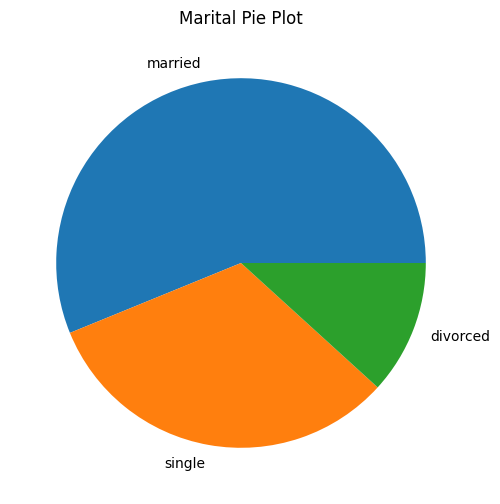

In [92]:
import matplotlib.pyplot as plt
marital_df = freq_after_change.reset_index()
marital_df.columns = ['status', 'frequency']
plt.figure(figsize=(10, 6))
plt.pie(marital_df['frequency'], labels=marital_df['status'])
plt.title('Marital Pie Plot')
plt.show()

#### 3.2. Examine the variable "Job". 

    a. write a code to combine the categories "admin." and "ADMINISTRATION" for the job column as "admin". replace any occurrence of "ADMINISTRATION" or "admin." with "admin". 

In [93]:
freq_before = bank['job'].value_counts()
print(freq_before)

job
management        2391
blue-collar       1914
technician        1768
admin.            1134
services           850
retired            757
student            375
self-employed      367
unemployed         353
entrepreneur       291
housemaid          262
unknown             65
ADMINISTRATION      51
Name: count, dtype: int64


In [94]:
bank['job'] = bank['job'].replace(['admin.', 'ADMINISTRATION'], 'admin')
freq_after = bank['job'].value_counts()
print(freq_after)

job
management       2391
blue-collar      1914
technician       1768
admin            1185
services          850
retired           757
student           375
self-employed     367
unemployed        353
entrepreneur      291
housemaid         262
unknown            65
Name: count, dtype: int64


### 4. Numerical variables 

##### <b>  4.1. Examine the age variable 

    a. show the basic statistics for the age variable and the skewness value. use df.colname.skew(). 
    b. show the histogram and qq plot for the age variable. is the age variable skewed? 
    c. perform a log2 transformation for the age variable. show the histogram and qq plot and skewness value. is the log2 transformation normally distributed? 

In [95]:
bank['age'].describe()


count    10558.000000
mean        41.264160
std         12.148345
min         18.000000
25%         32.000000
50%         39.000000
75%         49.000000
max        146.000000
Name: age, dtype: float64

In [96]:
age_skewness = bank.age.skew()
print(age_skewness)

1.008184106102808


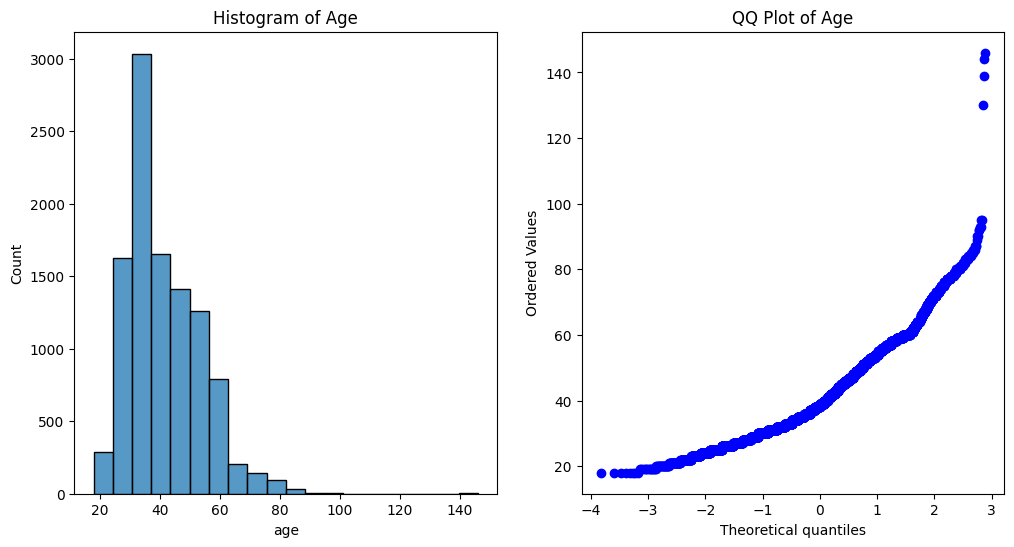

In [97]:
import scipy.stats as stats
import seaborn as sns

plt.figure(figsize=(12, 6))

# Histogram for 'age'
plt.subplot(1, 2, 1)
sns.histplot(bank['age'], bins=20)
plt.title('Histogram of Age')

# QQ plot for 'age'
plt.subplot(1, 2, 2)
stats.probplot(bank['age'], plot=plt)
plt.title('QQ Plot of Age')

plt.show()

In [98]:
# Check if 'age' is skewed
print("\nThe age variable is skewed:", age_skewness != 0)


The age variable is skewed: True


0.21438373418355325


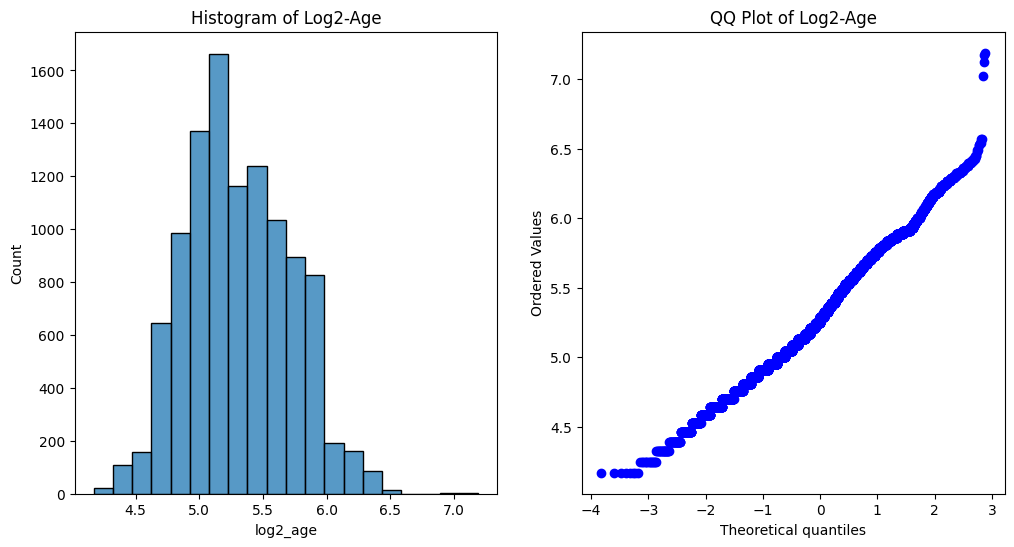


Is the log 2 transformed age normally distributed? True


In [99]:
bank['log2_age'] = np.log2(bank['age'])
log2_age_skewness = bank['log2_age'].skew()
print(log2_age_skewness)

plt.figure(figsize=(12, 6))

# Histogram for Log2-age
plt.subplot(1, 2, 1)
sns.histplot(bank['log2_age'], bins=20)
plt.title('Histogram of Log2-Age')

# QQ plot for Log2-age
plt.subplot(1, 2, 2)
stats.probplot(bank['log2_age'], plot=plt)
plt.title('QQ Plot of Log2-Age')

plt.show()

# Check if the Log2-age is normally distributed
print("\nIs the log 2 transformed age normally distributed?", abs(log2_age_skewness) < 0.5)

##### <b> 4.2. Missing values 

    a. show the number of missing values for each variable in the bank dataframe. 
    b. show the avg age for each job category. 
    c. add a new column to the dataframe name 'age_imputed' for replacing the missing values under the age columns with the average age given the job. 

In [100]:
missing_values = bank.isnull().sum()
print(missing_values)

education       0
customer_id     0
age            20
marital         0
job             0
default         0
balance         0
housing         0
loan            0
log2_age       20
dtype: int64


In [101]:
avg_age_for_job = bank.groupby('job')['age'].mean()
print(avg_age_for_job)

job
admin            39.246414
blue-collar      39.691099
entrepreneur     42.448276
housemaid        47.547893
management       40.116709
retired          64.896962
self-employed    39.307902
services         38.504717
student          25.920000
technician       39.416431
unemployed       41.116147
unknown          47.123077
Name: age, dtype: float64


In [102]:
bank['age_imputed'] = bank['age'].fillna(bank.groupby('job')['age'].transform('mean'))


In [103]:
missing_rows = bank[bank['age'].isnull()]
print(missing_rows)

      education  customer_id  age   marital           job default  balance  \
119    tertiary       100898  NaN   married    management      no      305   
592    tertiary       103782  NaN   married    technician      no       94   
784     primary       104872  NaN   married   blue-collar      no        5   
1383    primary       108581  NaN   married   blue-collar      no      572   
2129  SECONDARY       112972  NaN   married    technician      no     -241   
2190  SECONDARY       113317  NaN  divorced     housemaid      no      188   
2506   tertiary       114933  NaN   married   blue-collar      no      597   
2549    primary       115167  NaN   married    management      no     3760   
2977  SECONDARY       117338  NaN  divorced      services      no      293   
3989   tertiary       122821  NaN    single    management      no        0   
4841   tertiary       127452  NaN   married    management      no     1654   
4946    primary       128062  NaN   married   blue-collar      n

##### <b> 4.3. Outlier detection  </b>

    a. Show the box plot for the balance variable. 
    b. show the upper and lower fence for the balance variable. 
    c. remove the outliers for the balance variable. 
    

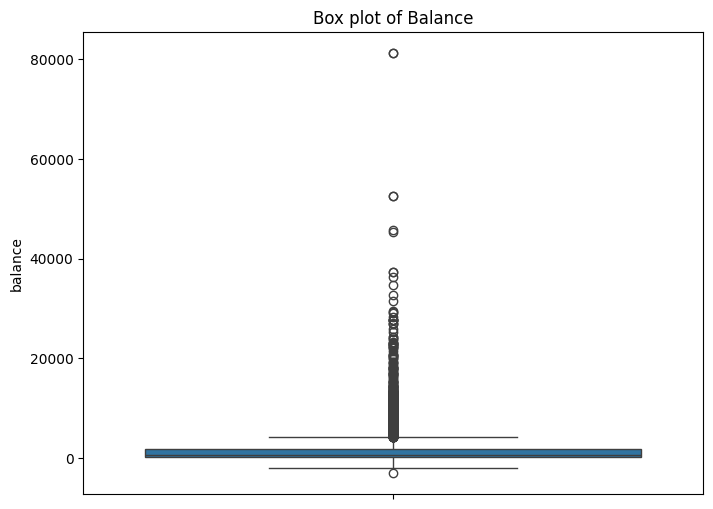

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(data=bank['balance'])
plt.title('Box plot of Balance')
plt.show()



In [105]:
Q1 = bank['balance'].quantile(0.25)
Q3 = bank['balance'].quantile(0.75)

IQR = Q3 - Q1

lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

print(f"Lower Fence: {lower_fence}")
print(f"Upper Fence: {upper_fence}")



Lower Fence: -2335.0
Upper Fence: 4225.0


In [106]:
bank_no_outliers = bank[(bank['balance'] >= lower_fence) & (bank['balance'] <= upper_fence)]

print("Original number of rows:", len(bank))
print("Number of rows after removing outliers:", len(bank_no_outliers))



Original number of rows: 10578
Number of rows after removing outliers: 9593


### 5. Variable correlation study 

##### <b> 5.1. Balance and loan. 

    a. create an equal sized binning for the balance variable. show the freq table. 
    b. show the cross table between balance and loan. perform the chi-2 test. 
    c. interpret the cross table and the chi-2 value. do people with loan have a positive balance? is there a relationship between the two variables? 
    

In [107]:
bin = pd.cut(bank['balance'], bins=5)
bank['balance_binned'] = bin

freq_balance = bank['balance_binned'].value_counts()
print(freq_balance)

balance_binned
(-3142.262, 13794.4]    10484
(13794.4, 30646.8]         82
(30646.8, 47499.2]          8
(47499.2, 64351.6]          2
(64351.6, 81204.0]          2
Name: count, dtype: int64


In [108]:
cross_tab = pd.crosstab(bank['balance_binned'], bank['loan'])
print(cross_tab)

chi2, p, dof, expected = stats.chi2_contingency(cross_tab)
print(f"Chi-Square value: {chi2}")
print(f"P-Value: {p}")

loan                    no   yes
balance_binned                  
(-3142.262, 13794.4]  9119  1365
(13794.4, 30646.8]      79     3
(30646.8, 47499.2]       8     0
(47499.2, 64351.6]       2     0
(64351.6, 81204.0]       2     0
Chi-Square value: 8.116775490403016
P-Value: 0.08739301319251225


In [109]:
# Cross-Table Interpretation:

# Most people with a "no" loan (9119) have balances in the first bin (-3142.262, 13794.4], while less people with a "yes" loan (1365) have high balance values. 
# This suggests that people with loans tend to have lower balances.

# Chi-Square Test Result:

# The Chi-Square value is 8.12, and the p-value is 0.087.
# Since the p-value is greater than 0.05, we fail to reject the null hypothesis. This means there is no relationship between balance and loan.


##### <b> 5.2. visual plots 

    a. subset the bank dataframe for balance between 0 and 2000 into balance2000 dataframe. 
    b. show colored scatter plot of balance and age from the balance2000 colored based on loan. 
    c. subset the bank dataframe into bank_loanyes and bankloanno then show density plots for both. use df.colname.plot.density() 


In [110]:
balance2000 = bank[(bank['balance'] >= 0) & (bank['balance'] <= 2000)]

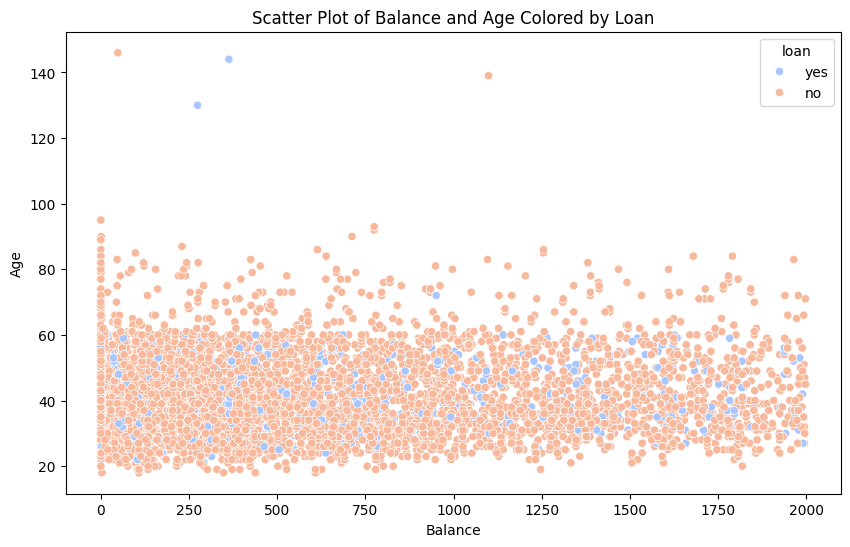

In [111]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=balance2000, x='balance', y='age', hue='loan', palette='coolwarm')
plt.title('Scatter Plot of Balance and Age Colored by Loan')
plt.xlabel('Balance')
plt.ylabel('Age')
plt.show()


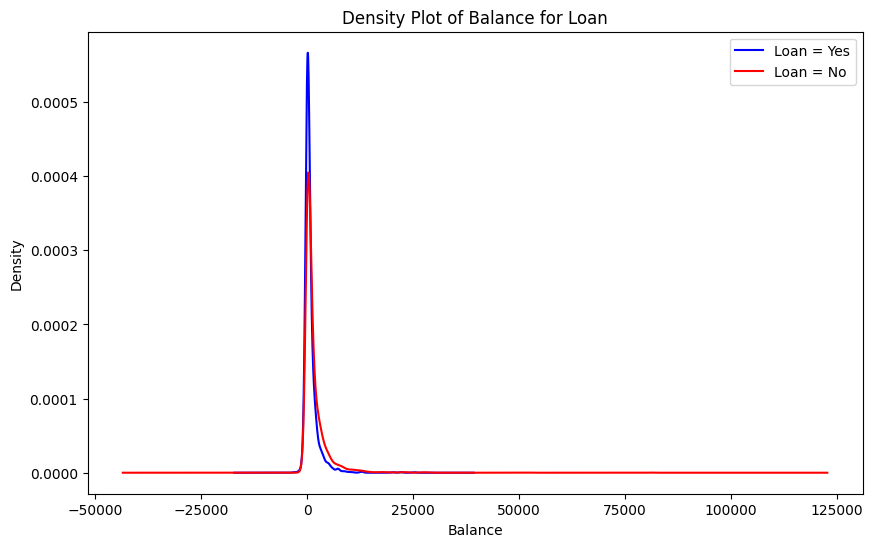

In [112]:
bank_loanyes = bank[bank['loan'] == 'yes']
bank_loanno = bank[bank['loan'] == 'no']
plt.figure(figsize=(10, 6))
bank_loanyes['balance'].plot.density(label='Loan = Yes', color='blue')
bank_loanno['balance'].plot.density(label='Loan = No', color='red')
plt.title('Density Plot of Balance for Loan')
plt.xlabel('Balance')
plt.ylabel('Density')
plt.legend()
plt.show()


### 6. apply, split-apply-combine 

##### 6.1. add dummy variables 

    a. lowercase the education column and replace unknown with secondary. 
    b. add a new column named secondary that takes the value 1 if education value is 'secondary' and 0 otherwise. use apply and lambda to create this new column,
    c. show the frequency table for secondary column.

In [113]:
bank['education'] = bank['education'].str.lower()
bank['education'] = bank['education'].replace('unknown', 'secondary')


In [114]:
bank['secondary'] = bank['education'].apply(lambda x: 1 if x == 'secondary' else 0)


In [115]:
print(bank['secondary'].value_counts())


secondary
1    5668
0    4910
Name: count, dtype: int64


##### 6.2. apply functions 

    a. define a function named custom_binning that is defined with x, th1 and th2 and assigns <=th1 if the value x is in less than or equal th1, [th1 th2] if the value x falls in the [th1 th2] bin and >=th2 if the value of x is greater than or equal th2. 
    b. apply the function on age with th1=30, th2=50. Show the frequency table. 

In [116]:
def custom_binning(x, th1, th2):
    if x <= th1:
        return f'<= {th1}'
    elif th1 < x <= th2:
        return f'[{th1}, {th2}]'
    else:
        return f'>= {th2}'


In [117]:
bank['age_bin'] = bank['age'].apply(custom_binning, th1=30, th2=50)

print(bank['age_bin'].value_counts())


age_bin
[30, 50]    6288
>= 50       2372
<= 30       1918
Name: count, dtype: int64


##### 6.3. vectorizing functions 
    a. define a vectorized function with housing, loan and education vectors. The function returns a score that accumulates points based on loan, housing and education. 
    The score increments as follows: 
    if housing is yes, the score adds by 1. 
    if loan is no, the score adds by 1. 
    if education is tertiary, the score increments by 1.   
    b. call the functions with housing, loan and education from bank dataframe. add risk column to the dataframe and show the frequency table.

    

In [118]:
import numpy as np

def calculate_risk_score(housing, loan, education):
    score = 0
    if housing == 'yes':
        score += 1
    if loan == 'no':
        score += 1
    if education == 'tertiary':
        score += 1
    return score

vectorized_risk_score = np.vectorize(calculate_risk_score)


In [119]:
bank['risk'] = vectorized_risk_score(bank['housing'], bank['loan'], bank['education'])

print(bank['risk'].value_counts())

    

risk
2    5151
1    3813
3    1193
0     421
Name: count, dtype: int64


##### 6.4. Aggregation 
    a. use agg() function after grouping by housing to calculate the median age, the mean balance.  
    b. use transform() function after grouping by housing to standardize the balance per each group. save into a new column named: balance_grpZ. call describe() on the new balance_grpZ column. 
    

In [120]:
agg_result = bank.groupby('housing').agg(
    median_age=('age', 'median'),
    mean_balance=('balance', 'mean')
)
print(agg_result)


         median_age  mean_balance
housing                          
no             41.0   1796.684939
yes            37.0   1273.153769


In [121]:
bank['balance_grpZ'] = bank.groupby('housing')['balance'].transform(lambda x: (x - x.mean()) / x.std())

print(bank['balance_grpZ'].describe())


count    1.057800e+04
mean    -2.686870e-18
std      9.999527e-01
min     -1.670476e+00
25%     -4.607507e-01
50%     -3.159644e-01
75%      6.859324e-02
max      2.250850e+01
Name: balance_grpZ, dtype: float64
